In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split

In [2]:
df=pd.read_csv("temperatures.csv")

In [3]:
df.head()

,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,JAN-FEB,MAR-MAY,JUN-SEP,OCT-DEC
0,1901,22.40,24.14,29.07,31.91,33.41,33.18,31.21,30.39,30.47,29.97,27.31,24.49,28.96,23.27,31.46,31.27,27.25
1,1902,24.93,26.58,29.77,31.78,33.73,32.91,30.92,30.73,29.80,29.12,26.31,24.04,29.22,25.75,31.76,31.09,26.49
2,1903,23.44,25.03,27.83,31.39,32.91,33.00,31.34,29.98,29.85,29.04,26.08,23.65,28.47,24.24,30.71,30.92,26.26
3,1904,22.50,24.73,28.21,32.02,32.64,32.07,30.36,30.09,30.04,29.20,26.36,23.63,28.49,23.62,30.95,30.66,26.40
4,1905,22.00,22.83,26.68,30.01,33.32,33.25,31.44,30.68,30.12,30.67,27.52,23.82,28.30,22.25,30.00,31.33,26.57


In [4]:
df.isnull().sum()

YEAR       0
JAN        0
FEB        0
MAR        0
APR        0
MAY        0
JUN        0
JUL        0
AUG        0
SEP        0
OCT        0
NOV        0
DEC        0
ANNUAL     0
JAN-FEB    0
MAR-MAY    0
JUN-SEP    0
OCT-DEC    0
dtype: int64

In [5]:
df.duplicated().sum()

0

In [6]:
X = df["YEAR"].values[:, None]
y = df["ANNUAL"]

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 2)

In [8]:
regressor = LinearRegression()

In [9]:

regressor.fit(X_train, y_train)

LinearRegression()

In [10]:
y_pred = regressor.predict(X_test)

In [11]:
print("Mean absolute error: ", metrics.mean_absolute_error(y_test, y_pred))
print("Mean squared error: ", metrics.mean_squared_error(y_test, y_pred))
print("R2 score: ", metrics.r2_score(y_test, y_pred))

Mean absolute error:  0.20544880638046958
Mean squared error:  0.06787195645553983
R2 score:  0.666554248618334


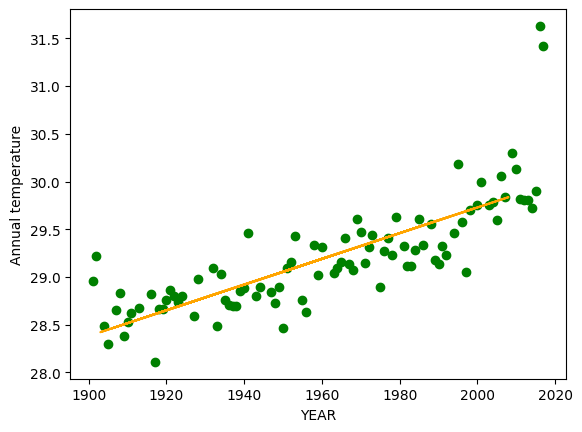

In [12]:
plt.scatter(X_train, y_train, color="green", label = "Actual")
plt.plot(X_test, y_pred, color = "orange", label = "Predicted")
plt.xlabel("YEAR")
plt.ylabel("Annual temperature")
plt.show()

In [ ]:
Got it! Let me give you a detailed, line-by-line explanation of your entire code and everything that happens, assuming no prior knowledge. I’ll break down every step clearly.

Step-by-step Detailed Explanation
python
Copy
Edit
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split
import pandas as pd
Imports the pandas library, used to handle data in tables called DataFrames (like Excel sheets). We alias it as pd for easy use.

import numpy as np
Imports NumPy, a library for numerical operations, especially with arrays.

import matplotlib.pyplot as plt
Imports matplotlib's pyplot module to create plots (graphs).

import seaborn as sns
Imports Seaborn, a statistical data visualization library built on matplotlib for prettier plots.

from sklearn.linear_model import LinearRegression
Imports the LinearRegression model from scikit-learn, a machine learning library.

from sklearn import metrics
Imports metrics module which contains tools to evaluate machine learning models.

from sklearn.model_selection import train_test_split
Imports the function to split data into training and testing sets.

python
Copy
Edit
df = pd.read_csv("temperatures.csv")
Reads the CSV file "temperatures.csv" into a pandas DataFrame called df.

The data now looks like a table in memory, with rows and columns representing years and monthly/annual temperatures.

python
Copy
Edit
df.head()
Displays the first 5 rows of the DataFrame so you can see what the data looks like.

Columns include:

YEAR (year of observation),

months (JAN, FEB, ...),

ANNUAL (annual average temperature),

and some seasonal averages.

python
Copy
Edit
df.isnull().sum()
Checks for missing values in each column.

.isnull() creates a table of True/False where True means missing value.

.sum() counts how many Trues per column.

Result: 0 for all, so no missing data.

python
Copy
Edit
df.duplicated().sum()
Checks if there are duplicate rows in the dataset.

Result is 0, so no duplicates.

python
Copy
Edit
X = df["YEAR"].values[:, None]
Selects the YEAR column as the feature (independent variable).

.values extracts data as a NumPy array.

[:, None] reshapes the array from 1D (like [1901, 1902, ...]) into 2D with shape (n_samples, 1), because scikit-learn expects a 2D array for features.

So X is now a column vector like:

css
Copy
Edit
[[1901],
 [1902],
 ...
]
python
Copy
Edit
y = df["ANNUAL"]
Selects the ANNUAL column as the target variable (dependent variable), the values we want to predict (annual average temperature).

python
Copy
Edit
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)
Splits the data into training and testing sets:

X_train, y_train used to train the model,

X_test, y_test used to evaluate how well the model learned.

test_size=0.2 means 20% of the data is reserved for testing.

random_state=2 ensures this split is reproducible every time you run the code.

python
Copy
Edit
regressor = LinearRegression()
Creates an instance of the LinearRegression model and assigns it to the variable regressor.

python
Copy
Edit
regressor.fit(X_train, y_train)
Fits (trains) the linear regression model using the training data.

The model learns the best straight line (y = mx + c) that fits the data points in the training set.

python
Copy
Edit
y_pred = regressor.predict(X_test)
Uses the trained model to predict annual temperatures for the years in the test set (X_test).

Predictions are stored in y_pred.

python
Copy
Edit
print("Mean absolute error: ", metrics.mean_absolute_error(y_test, y_pred))
print("Mean squared error: ", metrics.mean_squared_error(y_test, y_pred))
print("R2 score: ", metrics.r2_score(y_test, y_pred))
Evaluates model performance on the test data:

Mean Absolute Error (MAE): Average absolute difference between actual and predicted values. Lower is better.

Mean Squared Error (MSE): Average squared difference, penalizing larger errors more. Lower is better.

R2 score: Proportion of variance in target explained by model, between 0 and 1 (1 is perfect). Higher is better.

python
Copy
Edit
plt.scatter(X_train, y_train, color="green", label="Actual (train)")
plt.scatter(X_test, y_test, color="blue", label="Actual (test)")
plt.plot(X_test, y_pred, color="orange", label="Predicted (test)")
plt.xlabel("YEAR")
plt.ylabel("Annual temperature")
plt.legend()
plt.show()
Visualizes the data and model predictions:

Green dots = actual training data points.

Blue dots = actual test data points.

Orange line = model predictions for test years (the regression line for those points).

Labels and legend added for clarity.

plt.show() displays the plot.

Summary of What the Model Does:
You want to predict the average annual temperature based on the year.

The model finds a best-fit line that describes the trend of temperature changes over years.

You split data so the model learns from some years (train), then test how well it predicts other years (test).

The evaluation metrics tell you the quality of your predictions: your R2 score (~0.67) shows the model explains about 67% of temperature variability by year, which is decent for a simple linear trend.

